In [1]:
import cv2

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Load data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


11501568/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


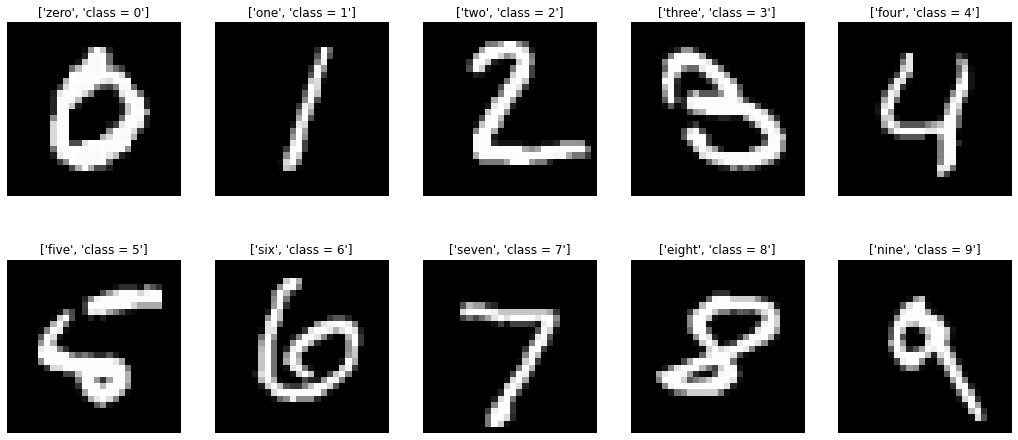

In [3]:
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pylab as plt

label_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

images = []
fig = plt.figure(figsize=(18, 8))

for kclass in range(0,10):
    ind = np.argwhere(y_test==kclass)
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(x_test[ind[0][0]].squeeze(), cmap='gray')
    images.append(x_test[ind[0][0]])
    ax.set_title([label_names[kclass], 'class = {}'.format(kclass)])
    ax.axis('off')
images=np.array(images)

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

In [6]:
idx = np.argsort(y_train)
x_train_sorted = x_train[idx]
y_train_sorted = y_train[idx]

x_train_zeros = x_train[y_train == 0]
x_train_ones = x_train[y_train == 1]
x_train_twos = x_train[y_train == 2]
x_train_threes = x_train[y_train == 3]
x_train_fours = x_train[y_train == 4]
x_train_fives = x_train[y_train == 5]
x_train_sixs = x_train[y_train == 6]
x_train_sevens = x_train[y_train == 7]
x_train_eights = x_train[y_train == 8]
x_train_nines = x_train[y_train == 9]

x_train_NEW1 = np.concatenate((x_train_zeros,x_train_ones,x_train_twos,x_train_threes,x_train_fours,x_train_fives,x_train_sixs,x_train_sevens,x_train_eights,x_train_nines))

In [7]:
img1_t = x_train_zeros[0].reshape(28,28)
img2_t = x_train_ones[1].reshape(28,28)
img3_t = x_train_twos[2].reshape(28,28)
img4_t = x_train_threes[3].reshape(28,28)
img5_t = x_train_fours[8].reshape(28,28)
img6_t = x_train_fives[5].reshape(28,28)
img7_t = x_train_sixs[5].reshape(28,28)
img8_t = x_train_sevens[5].reshape(28,28)
img9_t = x_train_eights[5].reshape(28,28)
img10_t = x_train_nines[5].reshape(28,28)
images_num =[img1_t,img2_t,img3_t,img4_t,img5_t,img6_t,img7_t,img8_t,img9_t,img10_t]

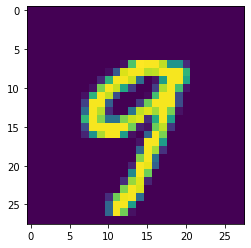

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img10_t)

In [8]:
mask_num=[]
for img in images_num:
  img=cv2.resize(img,(12,12))
  mask= np.zeros((28,28))
  mask[:12,16:]=img
  mask_num.append(mask)

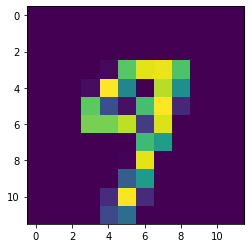

In [9]:
plt.imshow(img)

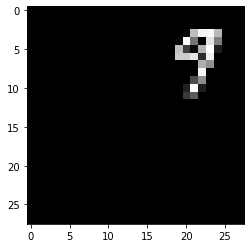

In [10]:
plt.imshow(mask_num[9] , cmap='gray')

In [11]:
x_train_masked=[]
count=0
for i in range(x_train.shape[0]):
  rand_pos = y_train[i]
  masked_img = x_train[i]+ np.expand_dims(mask_num[rand_pos],axis=-1)
  x_train_masked.append(masked_img)
  #print(count,end='\r')
  count+=1
x_train_masked = np.array(x_train_masked)

x _train_masked will have masked images o train data

In [12]:
x_test_masked=[]
count=0
for i in range(x_test.shape[0]):
  rand_pos = y_test[i]
  masked_img = x_test[i]+ np.expand_dims(mask_num[rand_pos],axis=-1)
  x_test_masked.append(masked_img)
  print(count,end='\r')
  count+=1
x_test_masked = np.array(x_test_masked)

In [13]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(name="features"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 features (Flatten)          (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [14]:
batch_size =256
epochs = 5
load_data='False'
if load_data == 'False':
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)
  #model.save(folder_data + '/model_saved') # save trained model

Epoch 1/5
211/211 [==============================] - 33s 14ms/step - loss: 0.5353 - accuracy: 0.8429 - val_loss: 0.1078 - val_accuracy: 0.9722
Epoch 2/5
211/211 [==============================] - 3s 12ms/step - loss: 0.1419 - accuracy: 0.9576 - val_loss: 0.0688 - val_accuracy: 0.9820
Epoch 3/5
211/211 [==============================] - 3s 12ms/step - loss: 0.1020 - accuracy: 0.9690 - val_loss: 0.0551 - val_accuracy: 0.9863
Epoch 4/5
211/211 [==============================] - 3s 12ms/step - loss: 0.0852 - accuracy: 0.9743 - val_loss: 0.0480 - val_accuracy: 0.9880
Epoch 5/5
211/211 [==============================] - 3s 12ms/step - loss: 0.0737 - accuracy: 0.9778 - val_loss: 0.0447 - val_accuracy: 0.9882


In [20]:
score = model.evaluate(x_test, y_test_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04286150261759758
Test accuracy: 0.98580002784729


In [21]:
y_test_pred = np.argmax(model.predict(x_test),axis=1) # convert back from one-hot categorical encoding to integers

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 974,    0,    1,    0,    0,    1,    1,    1,    2,    0],
       [   0, 1128,    2,    1,    0,    1,    1,    1,    1,    0],
       [   0,    3, 1021,    1,    1,    0,    0,    5,    1,    0],
       [   0,    0,    4,  995,    0,    5,    0,    3,    3,    0],
       [   1,    0,    1,    0,  964,    0,    3,    1,    3,    9],
       [   1,    0,    0,    2,    0,  885,    2,    1,    1,    0],
       [   6,    2,    0,    0,    1,    5,  943,    0,    1,    0],
       [   0,    2,    9,    2,    0,    1,    0, 1009,    1,    4],
       [   5,    0,    4,    1,    1,    1,    0,    5,  952,    5],
       [   1,    3,    0,    1,    1,    5,    0,    6,    5,  987]])

In [23]:
  model.save('/content/model_saved') # save trained model

INFO:tensorflow:Assets written to: /content/model_saved/assets


Let's apply some DL interpretability techniques to further understand the DL feature extraction and classification procedure. Let's consider the full DL model architecture

In [24]:
batch_size =256
epochs = 5
load_data='False'
if load_data == 'False':
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.fit(x_train_masked, y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)
  model.save('/content/masked_model_saved') # save trained masked model

Epoch 1/5
211/211 [==============================] - 3s 14ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0202 - val_accuracy: 0.9948
Epoch 2/5
211/211 [==============================] - 3s 12ms/step - loss: 0.0195 - accuracy: 0.9942 - val_loss: 0.0099 - val_accuracy: 0.9973
Epoch 3/5
211/211 [==============================] - 3s 12ms/step - loss: 0.0092 - accuracy: 0.9974 - val_loss: 0.0059 - val_accuracy: 0.9990
Epoch 4/5
211/211 [==============================] - 3s 12ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 5/5
211/211 [==============================] - 3s 12ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0028 - val_accuracy: 0.9992
INFO:tensorflow:Assets written to: /content/masked_model_saved/assets


In [25]:
y_test_cat_pred = np.argmax(model.predict(x_test_masked),axis=1) # convert back from one-hot categorical encoding to integers

In [27]:
y_test_cat1 = np.argmax(y_test_cat,axis=1)

In [28]:
y_test_cat1

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_cat1, y_test_cat_pred)
cm

array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1032,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1010,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  892,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    1,  956,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1028,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1009]])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 features (Flatten)          (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Check dimensions of all convolutional layers in the architecture

In [31]:
for layer in model.layers:
	if 'conv' not in layer.name:
		continue
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


In [32]:
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pylab as plt

label_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
images = []
for kclass in range(0,10):
    ind = np.argwhere(y_test==kclass)
    images.append(x_test_masked[ind[0][0]])
images=np.array(images)

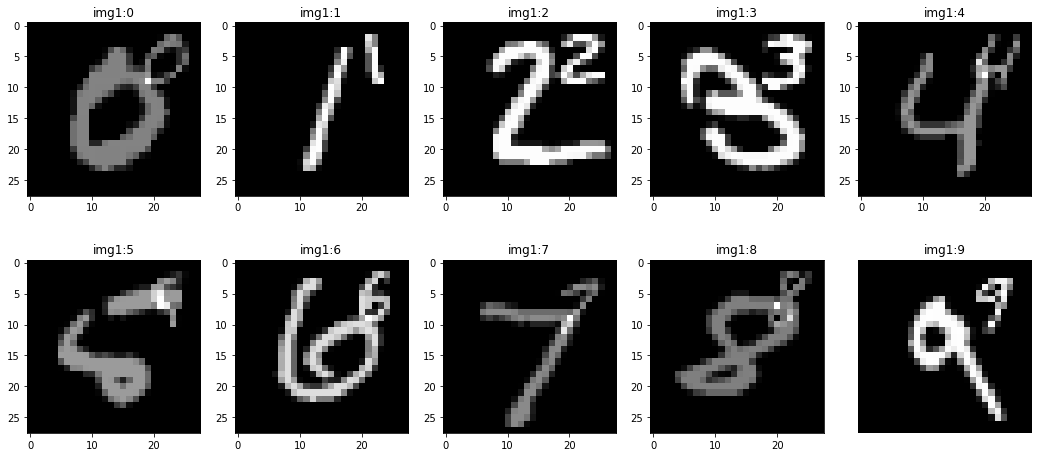

In [33]:

def plot_images(images):
    fig = plt.figure(figsize=(18, 8))

    k=0
    for i in range(2):
        for j in range(5):
            ax = fig.add_subplot(2, 5, k+1)
            ax.imshow(np.squeeze(images[k],axis=-1), cmap='gray') 
            ax.set_title('img1:'+ str(k))
            k+=1

    ax.axis('off')
    plt.show()
plot_images(images)



In [34]:
def model_modifier(current_model):
    current_model.layers[-1].activation = tf.keras.activations.linear
    return current_model

In [35]:
!pip install tf-keras-vis

     |████████████████████████████████| 53 kB 1.3 MB/s 


In [36]:
incorrects=[]
actual=[]
predicted=[]
model=keras.models.load_model('/content/model_saved')
for i in range(1000):
  pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
  y_pred=int(pred.argmax())
  if y_pred != y_test[i]:
    print(i,y_pred,y_test[i])
    incorrects.append(i)
    actual.append(y_test[i])
    predicted.append(y_pred)

259 0 6
320 8 9
321 7 2
445 0 6
449 5 3
582 2 8
659 1 2
684 3 7
717 5 0
726 5 7
740 9 4
844 7 8
882 7 9
938 5 3
947 9 8
965 0 6


In [37]:
incorrects_masked=[]
actual_masked=[]
predicted_masked=[]

model=keras.models.load_model('/content/masked_model_saved')
for i in range(5000):
  pred = model.predict(x_test_masked[i].reshape(1, 28, 28, 1))
  y_pred=int(pred.argmax())
  if y_pred != y_test[i]:
    print(i,y_pred,y_test[i])
    incorrects_masked.append(i)
    actual_masked.append(y_test[i])
    predicted_masked.append(y_pred)

1014 5 6
3520 4 6


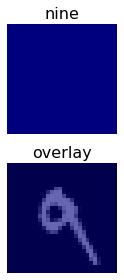

In [47]:

from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore
def grad_plot(images):
    
    img1 = x_test[3].reshape(28,28) # number 0;out of 10000, the third position image is zero
    img2 = x_test[2].reshape(28,28) # number 1
    img3 = x_test[1].reshape(28,28) # number 2
    img4 = x_test[18].reshape(28,28)
    img5 = x_test[4].reshape(28,28)
    img6 = x_test[8].reshape(28,28)
    img7 = x_test[11].reshape(28,28)
    img8 = x_test[0].reshape(28,28)
    img9 = x_test[61].reshape(28,28)
    img10= x_test[7].reshape(28,28) #number 9
    #images = np.asarray([np.array(img1), np.array(img2), np.array(img3),np.array(img4),np.array(img5),np.array(img6),np.array(img7),np.array(img8),np.array(img9),np.array(img10)])
    images = np.asarray([np.array(img10)])

    X = images.reshape(1,28,28,1)

    #score = CategoricalScore([i for i in range(10)])
  
    score = CategoricalScore([9])  
    model=keras.models.load_model('/content/model_saved')
    # Create Gradcam object
    gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)

    # Generate heatmap with GradCAM
    cam = gradcam(score, X, penultimate_layer=-1)

    # Render
    f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 4))
    #for i, title in enumerate([i for i in range(1)]):
    heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
    ax[0].set_title('nine',fontsize=16)
    ax[0].imshow(heatmap, cmap='jet', alpha=1) # overlay
    ax[0].axis('off')

    rgb=cv2.cvtColor(np.asarray(images[0], np.float32),cv2.COLOR_GRAY2RGB)
    fin = cv2.addWeighted( heatmap, 0.6,  np.asarray(rgb*255., np.uint8), 0.4, 0)

    ax[1].set_title('overlay', fontsize=16)
    ax[1].imshow(fin, cmap='jet', alpha=1) # overlay
    ax[1].axis('off')
    plt.tight_layout()
    #plt.show()
grad_plot(images)
plt.savefig('grad_unmasked_9.jpg')

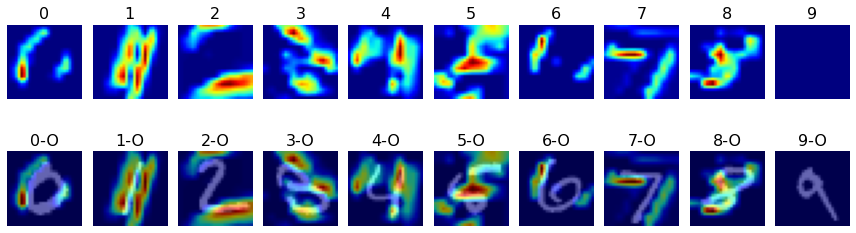

In [50]:

from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore
def grad_plot(images):
    
    img1 = x_test[3].reshape(28,28) # number 0;out of 10000, the third position image is zero
    img2 = x_test[2].reshape(28,28) # number 1
    img3 = x_test[1].reshape(28,28) # number 2
    img4 = x_test[18].reshape(28,28)
    img5 = x_test[4].reshape(28,28)
    img6 = x_test[8].reshape(28,28)
    img7 = x_test[11].reshape(28,28)
    img8 = x_test[0].reshape(28,28)
    img9 = x_test[61].reshape(28,28)
    img10= x_test[7].reshape(28,28) #number 9
    images = np.asarray([np.array(img1), np.array(img2), np.array(img3),np.array(img4),np.array(img5),np.array(img6),np.array(img7),np.array(img8),np.array(img9),np.array(img10)])


    X = images.reshape(10,28,28,1)

    score = CategoricalScore([i for i in range(10)])
  
    model=keras.models.load_model('/content/model_saved')
    # Create Gradcam object
    gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)

    # Generate heatmap with GradCAM
    cam = gradcam(score, X, penultimate_layer=-1)

    # Render
    f, ax = plt.subplots(nrows=2, ncols=10, figsize=(12, 4))
    for i, title in enumerate([i for i in range(10)]):
        heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
        ax[0][i].set_title(title, fontsize=16)
        ax[0][i].imshow(heatmap, cmap='jet', alpha=1) # overlay
        ax[0][i].axis('off')


        rgb=cv2.cvtColor(np.asarray(images[i], np.float32),cv2.COLOR_GRAY2RGB)

        fin = cv2.addWeighted( heatmap, 0.6,  np.asarray(rgb*255., np.uint8), 0.4, 0)

        ax[1][i].set_title(str(title)+'-O', fontsize=16)
        ax[1][i].imshow(fin, cmap='jet', alpha=1) # overlay
        ax[1][i].axis('off')
    plt.tight_layout()
    #plt.show()
grad_plot(images)
plt.savefig('grad_unmasked.jpg')

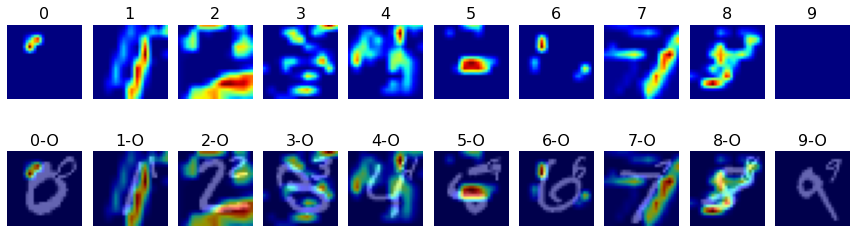

In [52]:

from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore
def grad_plot(images):
    X = images
    
    score = CategoricalScore([i for i in range(10)])
    model_masked = keras.models.load_model('/content/masked_model_saved')
    # Create Gradcam object
    gradcam = Gradcam(model_masked,model_modifier=model_modifier,clone=False)

    # Generate heatmap with GradCAM
    cam = gradcam(score, X, penultimate_layer=-1)
    
    # Render
    f, ax = plt.subplots(nrows=2, ncols=10, figsize=(12, 4))
    for i, title in enumerate([i for i in range(10)]):
        heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
        ax[0][i].set_title(title, fontsize=16)
        ax[0][i].imshow(heatmap, cmap='jet', alpha=1) # overlay
        ax[0][i].axis('off')


        rgb=cv2.cvtColor(np.asarray(images[i], np.float32),cv2.COLOR_GRAY2RGB)

        fin = cv2.addWeighted( heatmap, 0.6,  np.asarray(rgb*255., np.uint8), 0.4, 0)

        ax[1][i].set_title(str(title)+'-O', fontsize=16)
        ax[1][i].imshow(fin, cmap='jet', alpha=1) # overlay
        ax[1][i].axis('off')
    plt.tight_layout()
    #plt.show()
grad_plot(images)
plt.savefig('grad_masked.jpg')

(10, 28, 28, 1)


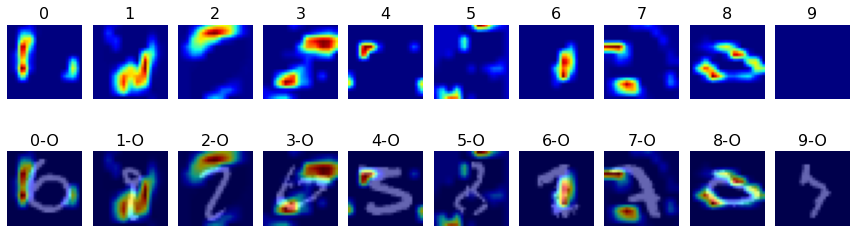

In [55]:

from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore
image_titles=incorrects[:10]
image_re= [x_test[i].reshape(28,28) for i in image_titles]
images = np.asarray([np.array(img) for img in image_re])
def grad_plot(images):
    
    X = images.reshape(len(image_titles),28,28,1)
    print(X.shape)
    
    score = CategoricalScore([i for i in range(10)])
    model=keras.models.load_model('/content/model_saved')
    # Create Gradcam object
    gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)

    # Generate heatmap with GradCAM
    cam = gradcam(score, X, penultimate_layer=-1)

    # Render
    f, ax = plt.subplots(nrows=2, ncols=10, figsize=(12, 4))
    for i, title in enumerate([i for i in range(10)]):
        heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
        ax[0][i].set_title(title, fontsize=16)
        ax[0][i].imshow(heatmap, cmap='jet', alpha=1) # overlay
        ax[0][i].axis('off')


        rgb=cv2.cvtColor(np.asarray(images[i], np.float32),cv2.COLOR_GRAY2RGB)

        fin = cv2.addWeighted( heatmap, 0.6,  np.asarray(rgb*255., np.uint8), 0.4, 0)

        ax[1][i].set_title(str(title)+'-O', fontsize=16)
        ax[1][i].imshow(fin, cmap='jet', alpha=1) # overlay
        ax[1][i].axis('off')
    plt.tight_layout()
    #plt.show()
grad_plot(images)
plt.savefig('grad_unmasked_misclassified.jpg')

(2, 28, 28, 1)


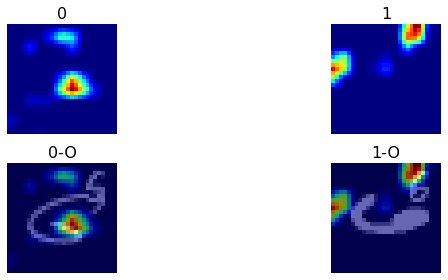

In [58]:

from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore
image_titles=incorrects_masked
image_re= [x_test_masked[i].reshape(28,28) for i in image_titles]
images = np.asarray([np.array(img) for img in image_re])
def grad_plot(images):
    
    X = images.reshape(len(image_titles),28,28,1)
    print(X.shape)
    
    score = CategoricalScore([5,4])
    model=keras.models.load_model('/content/masked_model_saved')
    # Create Gradcam object
    gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)

    # Generate heatmap with GradCAM
    cam = gradcam(score, X, penultimate_layer=-1)

    # Render
    f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))
    for i, title in enumerate([i for i in range(2)]):
        heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
        ax[0][i].set_title(title, fontsize=16)
        ax[0][i].imshow(heatmap, cmap='jet', alpha=1) # overlay
        ax[0][i].axis('off')


        rgb=cv2.cvtColor(np.asarray(images[i], np.float32),cv2.COLOR_GRAY2RGB)

        fin = cv2.addWeighted( heatmap, 0.6,  np.asarray(rgb*255., np.uint8), 0.4, 0)

        ax[1][i].set_title(str(title)+'-O', fontsize=16)
        ax[1][i].imshow(fin, cmap='jet', alpha=1) # overlay
        ax[1][i].axis('off')
    plt.tight_layout()
    #plt.show()
grad_plot(images)
plt.savefig('grad_misclass_masked.jpg')